In [1]:
import json
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import dataset_utils.utils_coco as utils
import dataset_utils.visualize_coco as visualize
import importlib


In [2]:
min_sc = 0.6

In [3]:
def load_image(image_path):
    img = cv2.imread(image_path)
    img = img[:, :, ::-1]
    return img

def ann_by_id(ann, img_id):
    l = []
    sc = []
    for a in ann:
        if(a["image_id"] == img_id):
            l.append(a)
            sc.append(a["score"])
    return l, sc

def remove_low_sc(ann):
    new_a = []
    for a in ann:
        if a['score'] > min_sc:
            new_a.append(a)
    return new_a

def round_all(ann):
    
    for a in ann:
        for i in range(len(a['center'])):
            a['center'][i] = int(np.round(a['center'][i]))
            
        for i in range(len(a['keypoints'])):
            a['keypoints'][i] = int(np.round(a['keypoints'][i]))
        
     

In [4]:
d = None
with open("E:\Baseline results\train_30ep\keypoints_test2017_results.json") as f:
    d = json.load(f)

In [5]:
print(len(d))
ann_filtred = remove_low_sc(d)
print(len(ann_filtred))
round_all(ann_filtred)

297198
13244


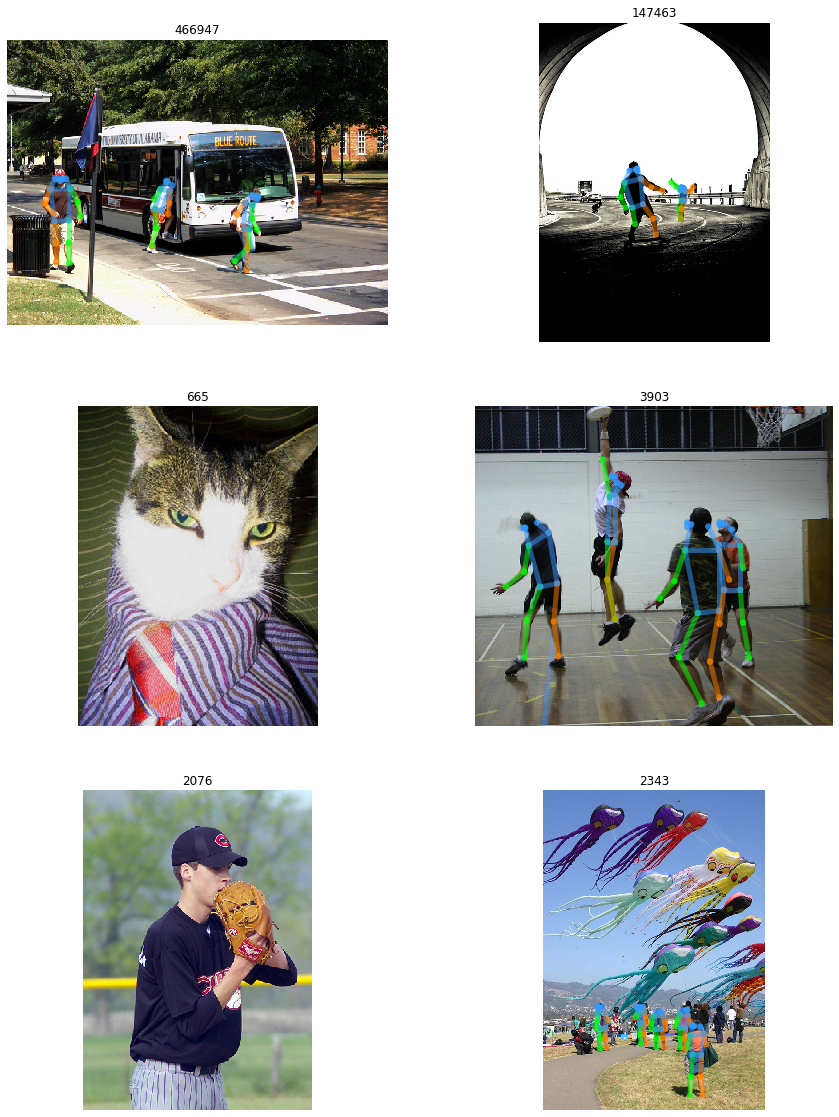

In [6]:
ids = [466947, 147463, 665, 3903, 2076, 2343]

anns = []
images = []

for img_id_n in ids:
    img_id = str(img_id_n)
    name = img_id.rjust(12, '0')
    name = name + ".jpg"
    a, sc = ann_by_id(ann_filtred, img_id_n)
    
    image = {"file_name" : name, "id" : img_id_n}
    
    anns.append(a)
    images.append(image)
    
visualize.visualize_image_annotations(images, anns, 'E:/Datasets/COCO/test2017', figsize=(15, 20))

In [7]:
output_path = "E:/Baseline results/train_30ep/person_keypoints_test-dev2017_baseline_results.json"

with open(output_path, 'w') as outfile:
    json.dump(ann_filtred, outfile, ensure_ascii=False, sort_keys=True, indent=4)